In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

df=pd.read_pickle('rterg_summary.pkl')

# fixes now implemented in main code
df=df.rename(columns={"Lat.":"Lat", "Long.":"Long","Ehf/Tr^3":"Ehf_Tr3"})
#df["Eventname"] = str(int(df["Eventname"])).zfill(8)   # convert to string with leading zeros
df["iMag"]=pd.to_numeric(df["iMag"], errors='coerce', downcast='float')   # to float (was str)
df

,Eventname,oTime,Lat,Long,Depth,Me,Txo,Ehf,Ebb,Mehf,Ehf_Tr3,Nstats,iMagType,SRC,iMag,TACER_HF,TACER_BB,Comment,mTime,iteration
0,00010500,2000-01-05 07:40:40+00:00,-11.27,165.25,15.0,6.28,83,1.300000e+13,5.900000e+13,6.31,2.300000e+07,19,M_,__,6.0,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-06 22:55:40+00:00,A
1,00010800,2000-01-08 01:19:46+00:00,-9.78,159.99,15.0,6.32,78,1.500000e+13,6.800000e+13,6.34,3.100000e+07,24,M_,__,6.4,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-06 23:28:08+00:00,A
2,00030693,1993-03-06 03:05:48+00:00,-10.73,164.02,15.0,0.00,538,0.000000e+00,-inf,1.00,0.000000e+00,0,M_,__,7.1,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1993,2016-12-07 00:13:59+00:00,A
3,00051699,1999-05-16 00:51:20+00:00,-4.99,152.76,42.0,6.93,90,1.900000e+14,5.600000e+14,7.08,2.600000e+08,27,M_,__,7.0,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1999,2016-12-08 17:45:51+00:00,A
4,00081695,1995-08-16 10:27:26+00:00,-5.51,153.64,45.6,0.00,392,0.000000e+00,-inf,4.00,0.000000e+00,0,M_,__,7.7,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1995,2016-12-08 18:21:34+00:00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,21030702,2021-03-07 19:28:47+00:00,-28.54,-177.01,10.0,5.54,84,2.100000e+12,4.600000e+12,5.78,3.500000e+06,37,M,US,5.5,27,31,NaN,2021-03-07 20:00:42+00:00,6
5012,21030703,2021-03-07 23:56:56+00:00,-29.60,-177.03,10.0,5.88,65,8.600000e+12,1.500000e+13,6.19,3.200000e+07,46,M,US,5.6,34.5,34,NaN,2021-03-08 00:33:27+00:00,6
5013,21030800,2021-03-08 12:56:34+00:00,-4.43,100.98,10.0,5.28,85,1.000000e+12,1.900000e+12,5.56,1.600000e+06,48,M,US,5.5,38.5,64,NaN,2021-03-08 13:27:39+00:00,6
5014,21031000,2021-03-10 20:12:37+00:00,-20.13,-177.67,488.0,6.25,89,3.400000e+13,5.300000e+13,6.58,4.800000e+07,57,M,US,5.8,12,12,NaN,2021-03-10 20:46:15+00:00,6


In [3]:
df2 = df.to_dict()
print(df2)

{'Eventname': {0: '00010500', 1: '00010800', 2: '00030693', 3: '00051699', 4: '00081695', 5: '00111600', 6: '00111601', 7: '00111700', 8: '00281695', 9: '03012000', 10: '07040100', 11: '07040101', 12: '07062800', 13: '07090200', 14: '07092600', 15: '07112700', 16: '08051200', 17: '08071900', 18: '08071901', 19: '09010301', 20: '09010302', 21: '09010303', 22: '09010304', 23: '09010305', 24: '09010306', 25: '09010402', 26: '09010500', 27: '09010501', 28: '09010600', 29: '09010601', 30: '09010700', 31: '09010800', 32: '09010900', 33: '09010901', 34: '09011300', 35: '09011500', 36: '09011501', 37: '09011502', 38: '09011600', 39: '09011700', 40: '09011800', 41: '09011900', 42: '09011901', 43: '09012000', 44: '09012100', 45: '09012200', 46: '09012201', 47: '09012202', 48: '09012300', 49: '09012301', 50: '09012400', 51: '09012401', 52: '09012600', 53: '09012601', 54: '09012602', 55: '09012700', 56: '09012701', 57: '09012702', 58: '09012800', 59: '09012801', 60: '09012802', 61: '09012900', 62:

# QuakeML (xml formatting) 

In [4]:
from obspy.core.event import Pick, WaveformStreamID, Arrival, Amplitude
from obspy.core.event import Event, Origin, Magnitude
from obspy.core.event import EventDescription, CreationInfo
from obspy import Catalog, UTCDateTime
from obspy import read_events

In [12]:
import obspy

#Create an obspy catalog object, add an event to it, and assign a 
#magnitude

extra = {'oTime': {'value': UTCDateTime('2013-01-02T13:12:14.600000Z'),
                          'namespace': 'OriginTime'}}
qml = obspy.core.event.Catalog()
qml.events.append(obspy.core.event.Event())
qml[0].magnitudes.append(obspy.core.event.magnitude.Magnitude())
qml[0].magnitudes[0].mag = 1.0
qml[0].magnitudes[0].magnitude_type = "Me"
#qml[1].magnitudes.append(obspy.core.event.magnitude.Magnitude())
qml[0].magnitudes[1].mag = 2.0
qml[0].magnitudes[1].magnitude_type = "Mi"
#Append a magnitude error
qml.extra = extra
#Write the object to a QuakeML
qml.write("test.xml", "quakeml")

#Read the resultant QuakeML file
result = read_events("test.xml")
result
#Try and retrieve the error that was stored in both the original and
#read in objects
#print(qml[0].magnitudes[0])

IndexError: list index out of range

In [5]:
Events = df.Eventname.to_numpy() #list()
com = df.Comment.tolist()
#test_event = Event(resource_id=str(Events),event_descriptions=com)
#print(test_event)


cat = read_events('my_catalog.xml')
extra = {'Eventname': {'value': True,
                    'namespace': 'http://some-page.de/xmlns/1.0',
                    'attribute': 10}}

cat.write('my_catalog.xml', format='QUAKEML')
cat
print(cat.extra)


AttribDict({'Eventname': AttribDict({'value': 'true', 'namespace': 'http://some-page.de/xmlns/1.0', 'attrib': {'{http://some-page.de/xmlns/1.0}my_attrib1': '1234'}})})


C:\Users\lbara\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\lbara\Anaconda\lib\site-packages\obspy\imaging\maps.py:303: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(


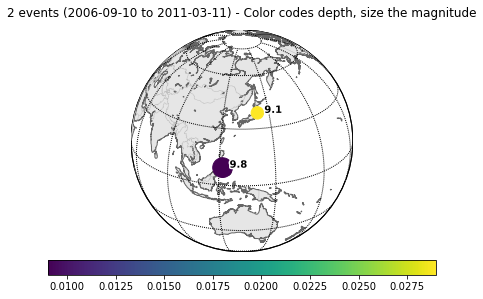

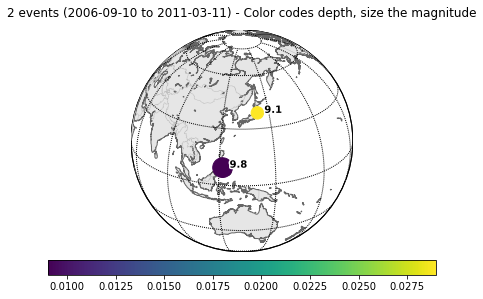

In [6]:
from obspy.core.event import read_events
cat = read_events('/path/to/iris_events.xml')
cat
cat.plot(projection="ortho")

In [51]:
def full_test_event(Eventname,oTime,Comment,Lat,Long,dep):
    """
    Function to generate a basic, full test event
    """
    from obspy.core.event import Pick, WaveformStreamID, Arrival, Amplitude
    from obspy.core.event import Event, Origin, Magnitude
    from obspy.core.event import EventDescription, CreationInfo
    from obspy import UTCDateTime
 
    test_event = Event()
    test_event.origins.append(Origin())
    test_event.origins[0].time = UTCDateTime(oTime)
    test_event.event_descriptions.append(EventDescription())
    test_event.event_descriptions[0].text = Comment
    test_event.origins[0].latitude = Lat
    test_event.origins[0].longitude = Long
    test_event.origins[0].depth = dep
    return test_event
full_test_event(1234,"2000-01-05",5,90,180,10)

Event:	2000-01-05T00:00:00.000000Z | +90.000, +180.000

	        resource_id: ResourceIdentifier(id="smi:local/3b828d8e-e175-437e-b1b2-a0edcff2c0de")
	               ---------
	 event_descriptions: 1 Elements
	            origins: 1 Elements

In [1]:
def full_test_event():
    """
    Function to generate a basic, full test event
    """
    from obspy.core.event import Pick, WaveformStreamID, Arrival, Amplitude
    from obspy.core.event import Event, Origin, Magnitude
    from obspy.core.event import EventDescription, CreationInfo
    from obspy import UTCDateTime
 
    test_event = Event()
    test_event.origins.append(Origin())
    test_event.origins[0].time = UTCDateTime("2012-03-26")
    test_event.event_descriptions.append(EventDescription())
    test_event.event_descriptions[0].text = 'LE'
    test_event.origins[0].latitude = 45.0
    test_event.origins[0].longitude = 25.0
    test_event.origins[0].depth = 15000
    test_event.creation_info = CreationInfo(agency_id='TES')
    test_event.origins[0].time_errors['Time_Residual_RMS'] = 0.01
    test_event.magnitudes.append(Magnitude())
    test_event.magnitudes[0].mag = 0.1
    test_event.magnitudes[0].magnitude_type = 'ML'
    test_event.magnitudes[0].creation_info = CreationInfo('TES')
    test_event.magnitudes[0].origin_id = test_event.origins[0].resource_id
    test_event.magnitudes.append(Magnitude())
    test_event.magnitudes[1].mag = 0.5
    test_event.magnitudes[1].magnitude_type = 'Mc'
    test_event.magnitudes[1].creation_info = CreationInfo('TES')
    test_event.magnitudes[1].origin_id = test_event.origins[0].resource_id
    test_event.magnitudes.append(Magnitude())
    test_event.magnitudes[2].mag = 1.3
    test_event.magnitudes[2].magnitude_type = 'Ms'
    test_event.magnitudes[2].creation_info = CreationInfo('TES')
    test_event.magnitudes[2].origin_id = test_event.origins[0].resource_id
 
    # Define the test pick
    _waveform_id_1 = WaveformStreamID(station_code='FOZ', channel_code='SHZ',
                                      network_code='NZ')
    _waveform_id_2 = WaveformStreamID(station_code='WTSZ', channel_code='BH1',
                                      network_code=' ')
    # Pick to associate with amplitude
    test_event.picks.append(Pick(waveform_id=_waveform_id_1,
                                 phase_hint='IAML',
                                 polarity='undecidable',
                                 time=UTCDateTime("2012-03-26") + 1.68))
    # Need a second pick for coda
    test_event.picks.append(Pick(waveform_id=_waveform_id_1,
                                 onset='impulsive', phase_hint='PN',
                                 polarity='positive',
                                 time=UTCDateTime("2012-03-26") + 1.68))

    # Test a generic local magnitude amplitude pick
    test_event.amplitudes.append(Amplitude(generic_amplitude=2.0,
                                           period=0.4,
                                           pick_id=test_event.picks[0].
                                           resource_id,
                                           waveform_id=test_event.picks[0].
                                           waveform_id,
                                           unit='m',
                                           magnitude_hint='Ml'))
    # Test a coda magnitude pick
    test_event.amplitudes.append(Amplitude(generic_amplitude=10,
                                           pick_id=test_event.picks[1].
                                           resource_id,
                                           waveform_id=test_event.picks[1].
                                           waveform_id,
                                           type='END',
                                           category='duration',
                                           unit='s',
                                           magnitude_hint='Mc',
                                           snr=2.3))

    return test_event

In [2]:
full_test_event()

C:\Users\lbara\Anaconda\lib\site-packages\obspy\core\util\attribdict.py:97: UserWarning: Setting attribute "Time_Residual_RMS" which is not a default attribute ("uncertainty", "lower_uncertainty", "upper_uncertainty", "confidence_level").
  warnings.warn(msg)


Event:	2012-03-26T00:00:01.000000Z | +45.000,  +25.000 | 0.1 ML

	        resource_id: ResourceIdentifier(id="smi:local/89b1592d-7ce1-46fc-8646-25907a130cc9")
	      creation_info: CreationInfo(agency_id='TES')
	               ---------
	 event_descriptions: 1 Elements
	              picks: 4 Elements
	         amplitudes: 2 Elements
	            origins: 1 Elements
	         magnitudes: 3 Elements

In [21]:
def full_test_event():
    """
    Function to generate a basic, full test event
    """
    from obspy.core.event import Pick, WaveformStreamID, Arrival, Amplitude
    from obspy.core.event import Event, Origin, Magnitude
    from obspy.core.event import EventDescription, CreationInfo
    from obspy import UTCDateTime
 
    test_event = Event()
    test_event.origins.append(Origin())
    test_event.origins[0].time = UTCDateTime("2012-03-26")
    test_event.event_descriptions.append(EventDescription())
    test_event.event_descriptions[0].text = 'LE'
    test_event.origins[0].latitude = 45.0
    test_event.origins[0].longitude = 25.0
    test_event.origins[0].depth = 15000
    test_event.creation_info = CreationInfo(agency_id='TES')
    test_event.origins[0].time_errors['Time_Residual_RMS'] = 0.01
    test_event.magnitudes.append(Magnitude())
    test_event.magnitudes[0].mag = 0.1
    test_event.magnitudes[0].magnitude_type = 'ML'
    test_event.magnitudes[0].creation_info = CreationInfo('TES')
    test_event.magnitudes[0].origin_id = test_event.origins[0].resource_id
    test_event.magnitudes.append(Magnitude())
    test_event.magnitudes[1].mag = 0.5
    test_event.magnitudes[1].magnitude_type = 'Mc'
    test_event.magnitudes[1].creation_info = CreationInfo('TES')
    test_event.magnitudes[1].origin_id = test_event.origins[0].resource_id
    test_event.magnitudes.append(Magnitude())
    test_event.magnitudes[2].mag = 1.3
    test_event.magnitudes[2].magnitude_type = 'Ms'
    test_event.magnitudes[2].creation_info = CreationInfo('TES')
    test_event.magnitudes[2].origin_id = test_event.origins[0].resource_id
 
    # Define the test pick
    _waveform_id_1 = WaveformStreamID(station_code='FOZ', channel_code='SHZ',
                                      network_code='NZ')
    _waveform_id_2 = WaveformStreamID(station_code='WTSZ', channel_code='BH1',
                                      network_code=' ')
    return test_event
catalog= full_test_event()
print(catalog)
print(catalog.magnitudes[1])

Event:	2012-03-26T00:00:00.000000Z | +45.000,  +25.000 | 0.1 ML

	        resource_id: ResourceIdentifier(id="smi:local/c1623c35-c3aa-4024-9d80-19e3c9878f0e")
	      creation_info: CreationInfo(agency_id='TES')
	               ---------
	 event_descriptions: 1 Elements
	            origins: 1 Elements
	         magnitudes: 3 Elements
Magnitude
	    resource_id: ResourceIdentifier(id="smi:local/e39100f5-fe97-4b09-9643-d5eb04a97cd7")
	            mag: 0.5
	 magnitude_type: 'Mc'
	      origin_id: ResourceIdentifier(id="smi:local/bb7556b0-439e-4866-8e49-2e60f38eb58b")
	  creation_info: CreationInfo(agency_id='TES')


In [ ]:
def sfiles_to_event(sfile_list):
    """
    Write an event.dat file from a list of Seisan events
 
    :type sfile_list: list
    :param sfile_list: List of s-files to sort and put into the database
 
    :returns: List of tuples of event ID (int) and Sfile name
    """
    event_list = []
    sort_list = [(sfile_util.readheader(sfile).origins[0].time, sfile)
                 for sfile in sfile_list]
    sort_list.sort(key=lambda tup: tup[0])
    sfile_list = [sfile[1] for sfile in sort_list]
    catalog = Catalog()
    for i, sfile in enumerate(sfile_list):
        event_list.append((i, sfile))
        catalog.append(sfile_util.readheader(sfile))
    # Hand off to sister function
    write_event(catalog)
    return event_list

In [ ]:
def read_select(select_file):
    """
    Read a catalog of events from a Nordic formatted select file.
    Generates a series of temporary files for each event in the select file.
 
    :type select_file: str
    :param select_file: Nordic formatted select.out file to open
 
    :return: catalog of events
    :rtype: obspy.core.event.Catalog
    """
    from obspy.core.event import Catalog
    from tempfile import NamedTemporaryFile
    import os
 
    catalog = Catalog()
    event_str = []
    f = open(select_file, 'r')
    for line in f:
        if len(line.rstrip()) > 0:
            event_str.append(line)
        elif len(event_str) > 0:
            # Write to a temporary file then read from it
            tmp_sfile = NamedTemporaryFile(mode='w', delete=False)
            for event_line in event_str:
                tmp_sfile.write(event_line)
            tmp_sfile.close()
            catalog += read_event(tmp_sfile.name)
            os.remove(tmp_sfile.name)
            event_str = []
    return catalog

In [ ]:
def event_to_quakeml(event, filename):
    """
    Write one of those events to QuakeML.
    """
    # Create all objects.
    cat = Catalog()
    ev = Event()
    org = Origin()
    mag = Magnitude()
    fm = FocalMechanism()
    mt = MomentTensor()
    t = Tensor()
    # Link them together.
    cat.append(ev)
    ev.origins.append(org)
    ev.magnitudes.append(mag)
    ev.focal_mechanisms.append(fm)
    fm.moment_tensor = mt
    mt.tensor = t
 
    # Fill values
    ev.resource_id = "smi:inversion/%s" % str(event["identifier"])
    org.time = event["time"]
    org.longitude = event["longitude"]
    org.latitude = event["latitude"]
    org.depth = event["depth_in_km"] * 1000
 
    mag.mag = event["Mw"]
    mag.magnitude_type = "Mw"
 
    t.m_rr = event["Mrr"]
    t.m_tt = event["Mpp"]
    t.m_pp = event["Mtt"]
    t.m_rt = event["Mrt"]
    t.m_rp = event["Mrp"]
    t.m_tp = event["Mtp"]
 
    cat.write(filename, format="quakeml")